# Imports

In [1]:
import os
os.chdir("D:\PulpitE\FPL_ML")

In [2]:
import pandas as pd
import numpy as np
import PIL
import urllib
from pathlib import Path
import math

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import plottable
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.formatters import decimal_to_percent
from plottable.plots import circled_image, image # image

In [3]:
DATA_PATH = "predictions/all_predictions.csv"
PLAYERS_TO_INCLUDE = 55 # takes top players sorted by prediction
PLAYERS_PER_PAGE = 20
# NUMBER_OF_PLOTS = math.ceil(PLAYERS_TO_INCLUDE / PLAYERS_PER_PAGE)
BASE_OUT_PATH = "plottable/predictions_plot"

# Data

In [4]:
df = pd.read_csv(DATA_PATH)

In [5]:
def team_to_logo(team_name):
    if team_name == "Arsenal":
        return "https://resources.premierleague.com/premierleague/badges/70/t3.png"
    if team_name == "Aston Villa":
        return "https://resources.premierleague.com/premierleague/badges/70/t7.png"
    if team_name == "Bournemouth":
        return "https://resources.premierleague.com/premierleague/badges/70/t91.png"
    if team_name == "Brentford":
        return "https://resources.premierleague.com/premierleague/badges/70/t94.png"
    if team_name == "Brighton":
        return "https://resources.premierleague.com/premierleague/badges/70/t36.png"
    if team_name == "Burnley":
        return "https://resources.premierleague.com/premierleague/badges/70/t90.png"
    if team_name == "Chelsea":
        return "https://resources.premierleague.com/premierleague/badges/70/t8.png"
    if team_name == "Crystal Palace":
        return "https://resources.premierleague.com/premierleague/badges/70/t31.png"
    if team_name == "Everton":
        return "https://resources.premierleague.com/premierleague/badges/70/t11.png"
    if team_name == "Fulham":
        return "https://resources.premierleague.com/premierleague/badges/70/t54.png"
    if team_name == "Leeds United":
        return "https://resources.premierleague.com/premierleague/badges/70/t2.png"
    if team_name == "Leicester City":
        return "https://resources.premierleague.com/premierleague/badges/70/t13.png"
    if team_name == "Liverpool":
        return "https://resources.premierleague.com/premierleague/badges/70/t14.png"
    if team_name == "Luton":
        return "https://resources.premierleague.com/premierleague/badges/70/t102.png"
    if team_name == "Manchester City":
        return "https://resources.premierleague.com/premierleague/badges/70/t43.png"
    if team_name == "Manchester Utd":
        return "https://resources.premierleague.com/premierleague/badges/70/t1.png"
    if team_name == "Newcastle Utd":
        return "https://resources.premierleague.com/premierleague/badges/70/t4.png"
    if team_name == "Nott'ham Forest":
        return "https://resources.premierleague.com/premierleague/badges/70/t17.png"
    if team_name == "Southampton":
        return "https://resources.premierleague.com/premierleague/badges/70/t20.png"
    if team_name == "Sheffield":
        return "https://resources.premierleague.com/premierleague/badges/70/t49.png"
    if team_name == "Tottenham":
        return "https://resources.premierleague.com/premierleague/badges/70/t6.png"
    if team_name == "West Ham":
        return "https://resources.premierleague.com/premierleague/badges/70/t21.png"
    if team_name == "Wolves":
        return "https://resources.premierleague.com/premierleague/badges/70/t39.png"
    
    # logo not found
    return "https://resources.premierleague.com/premierleague/badges/70/t21.png"

In [6]:
df['Venue'] = np.where(df['Was_home'] == 1, 'H', 'A')

In [7]:
df["Logo_team"] = df["Team"].apply(team_to_logo)
df["Logo_opponent"] = df["Opponent"].apply(team_to_logo)

In [8]:
NEXT_GAMEWEEK = 31
df = df[df["GW"] == NEXT_GAMEWEEK]

In [9]:
df = df.rename(columns={"Pred": "Prediction", "FPL_pos": "Pos", "Name_original": "Name"}, errors="raise")
df['Prediction'] = df['Prediction'].apply(lambda x: format(round(x, 2), '.2f')).astype("float")

In [10]:
df = df.head(PLAYERS_TO_INCLUDE)

In [11]:
df.columns

Index(['Name', 'GW', 'Season', 'Team', 'Opponent', 'Was_home', 'Team_rating',
       'Opp_rating', 'Pos', 'FPL_points', 'Prediction', 'Venue', 'Logo_team',
       'Logo_opponent'],
      dtype='object')

In [12]:
df["Prediction"].head(10)

1     7.90
8     5.95
24    5.23
29    5.09
36    5.00
38    4.99
56    4.72
60    4.69
62    4.68
72    4.59
Name: Prediction, dtype: float64

In [13]:
df.head()

,Name,GW,Season,Team,Opponent,Was_home,Team_rating,Opp_rating,Pos,FPL_points,Prediction,Venue,Logo_team,Logo_opponent
1,Leandro Trossard,31,2022-23,Arsenal,West Ham,0.0,1957.524048,1754.553955,MID,1.0,7.90,A,https://resources.premierleague.com/premierlea...,https://resources.premierleague.com/premierlea...
8,Harry Kane,31,2022-23,Tottenham,Bournemouth,1.0,1854.798462,1668.258545,FWD,2.0,5.95,H,https://resources.premierleague.com/premierlea...,https://resources.premierleague.com/premierlea...
24,Gabriel Martinelli Silva,31,2022-23,Arsenal,West Ham,0.0,1957.524048,1754.553955,MID,5.0,5.23,A,https://resources.premierleague.com/premierlea...,https://resources.premierleague.com/premierlea...
29,Erling Haaland,31,2022-23,Manchester City,Leicester City,1.0,2063.473633,1725.040527,FWD,12.0,5.09,H,https://resources.premierleague.com/premierlea...,https://resources.premierleague.com/premierlea...
36,Son Heung-min,31,2022-23,Tottenham,Bournemouth,1.0,1854.798462,1668.258545,MID,9.0,5.00,H,https://resources.premierleague.com/premierlea...,https://resources.premierleague.com/premierlea...


# Plot table

In [14]:
cols = [
    "Name",
    "Logo_team",
    "Team",
    "Logo_opponent",
    "Opponent",
    "Pos",
    "Venue",
    "Prediction"
]

In [15]:
df = df[cols]

In [16]:
df = df.set_index("Name")

In [17]:
cmap = LinearSegmentedColormap.from_list(
    name="points_cmap", colors=["#ffffff", "#f2fbd2", "#c9ecb4", "#93d3ab", "#35b0ab"], N=512
)

In [18]:
plt.rcParams["font.family"] = ["DejaVu Sans"]
plt.rcParams["savefig.bbox"] = "tight"

In [19]:
col_defs = (
    [
        ColumnDefinition(
            name="Name",
            textprops={"ha": "left", "weight": "bold"},
            width=1,
        ),
        ColumnDefinition(
            name="Logo_team",
            title="Team",
            textprops={"ha": "left"},
            width=0.1,
            plot_fn=image,
        ),
        ColumnDefinition(
            name="Team",
            title="",
            textprops={"ha": "left"},
            width=0.9,
        ),
        ColumnDefinition(
            name="Logo_opponent",
            title="Opponent",
            textprops={"ha": "left"},
            width=0.1,
            plot_fn=image,
        ),
        ColumnDefinition(
            name="Opponent",
            title="",
            textprops={"ha": "left"},
            width=0.9,
        ),
        ColumnDefinition(
            name="Pos",
            title="Position",
            textprops={"ha": "left"},
            width=0.5,
        ),
        ColumnDefinition(
            name="Venue",
            textprops={"ha": "center"},
            width=0.25,
        ),
        ColumnDefinition(
            name="Prediction",
            textprops={"ha": "center", "weight": "bold"},
            width=0.6,
            cmap=normed_cmap(df["Prediction"], cmap=cmap)
        )
    ]
)

# Saving plots

C:\users\user\appdata\local\programs\python\python38\lib\site-packages\plottable\plots.py:23: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  img = plt.imread(path)


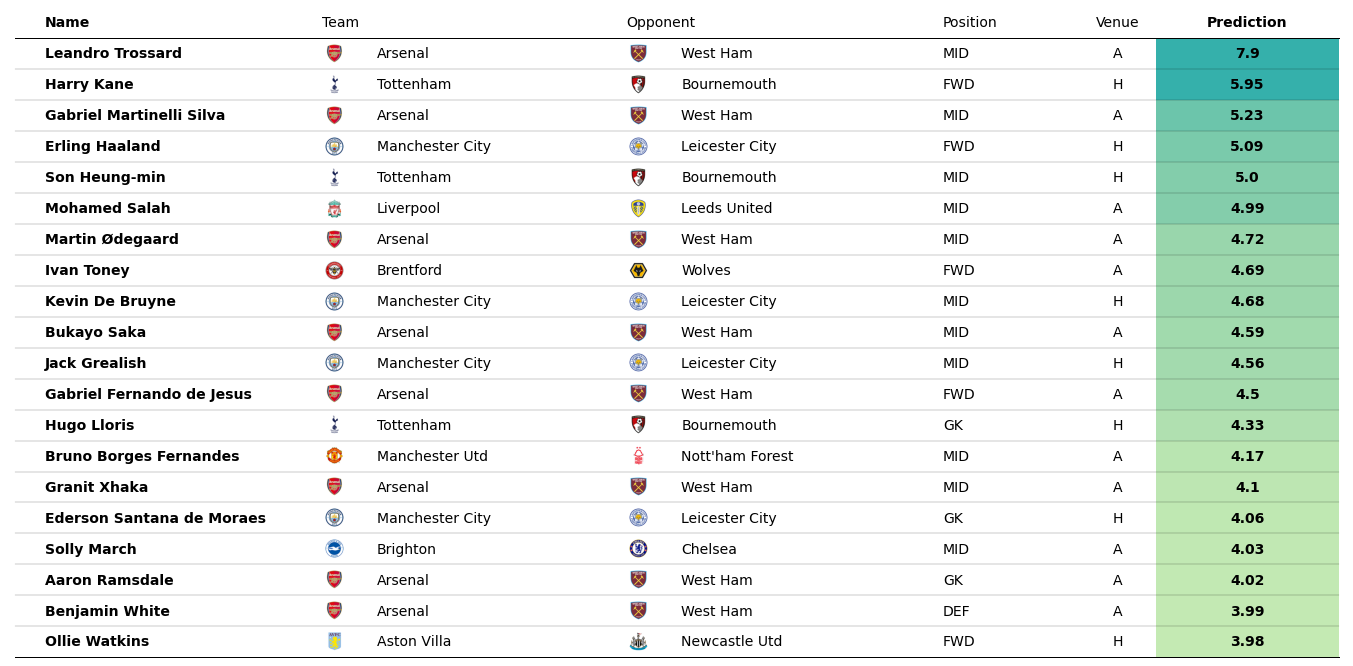

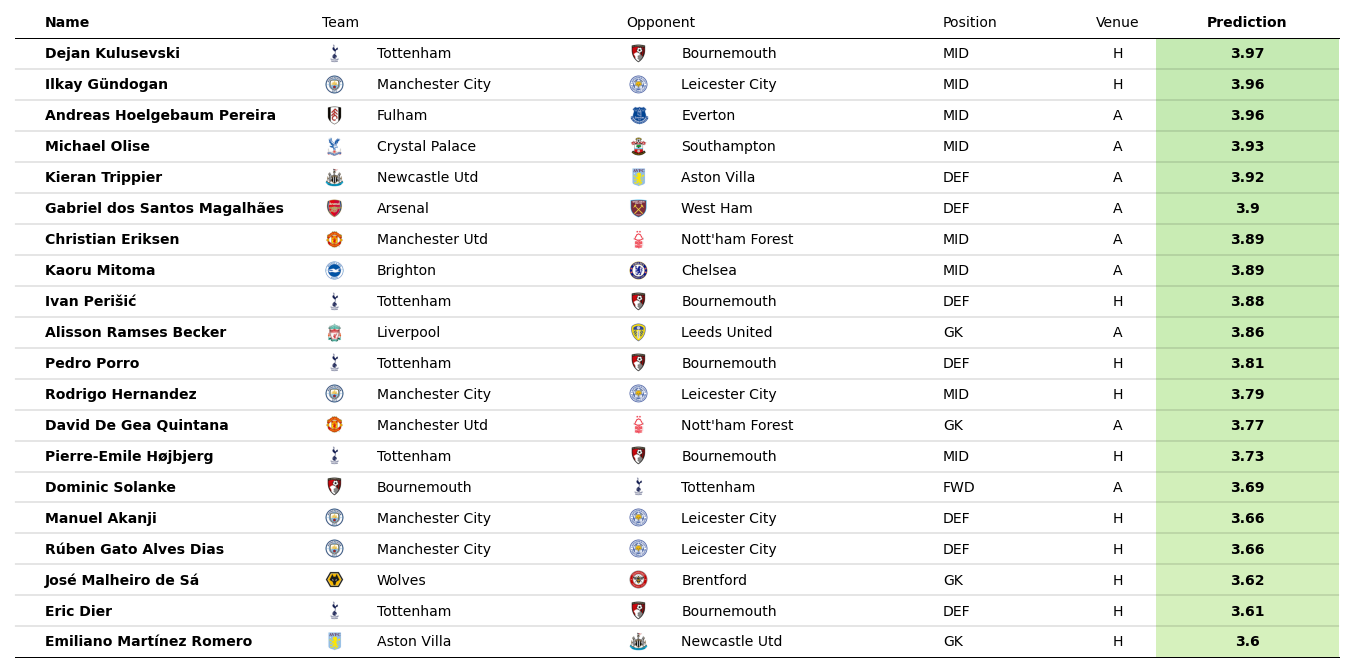

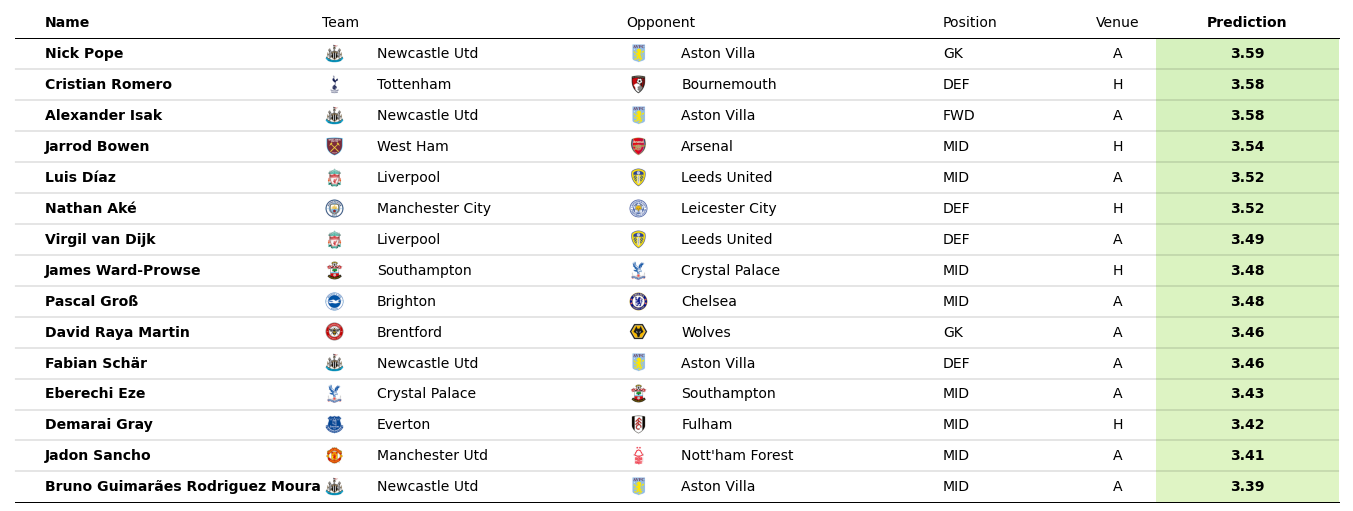

In [20]:
l = 0
p = PLAYERS_PER_PAGE
i = 1

while l <= PLAYERS_TO_INCLUDE:
    PLAYERS_ON_PAGE = min(PLAYERS_PER_PAGE, PLAYERS_TO_INCLUDE - l)
    
    fig, ax = plt.subplots(figsize=(24, ( (PLAYERS_ON_PAGE + 1) / 42) * 24))

    table = Table(
        df[l:p],
        column_definitions=col_defs,
        row_dividers=True,
        footer_divider=True,
        ax=ax,
        textprops={"fontsize": 14},
        col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
        column_border_kw={"linewidth": 1, "linestyle": "-"},
    )

    # saving plot
    fig.savefig(BASE_OUT_PATH + f"_{i}.png", facecolor=ax.get_facecolor(), dpi=200)
    
    l += PLAYERS_PER_PAGE
    p += PLAYERS_PER_PAGE
    i += 1